<a href="https://colab.research.google.com/github/beiyonder/TrainingWithYOLOv-x/blob/main/tinyYOLOv4_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/
%rm -rf darnet

/content


In [ ]:
!git clone  https://github.com/AlexeyAB/darknet

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


In [5]:
!ln -s /content/gdrive/My\Drive/ /mydrive

In [ ]:
!ls /mydrive/yolov4-tiny/

In [ ]:
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
!make

In [ ]:
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yolov4-tiny/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

In [11]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg

In [12]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yolov4-tiny/obj.names ./data
!cp /mydrive/yolov4-tiny/obj.data  ./data

In [13]:
#copy the process.py file from the drive to the darknet directory
!cp /mydrive/yolov4-tiny/process.py ./

In [14]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/darknet
labels	obj  obj.data  obj.names  test.txt  train.txt


In [ ]:
# Download the yolov4-tiny pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

In [ ]:
!nvidia-smi

In [ ]:
!nvcc --version

In [35]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

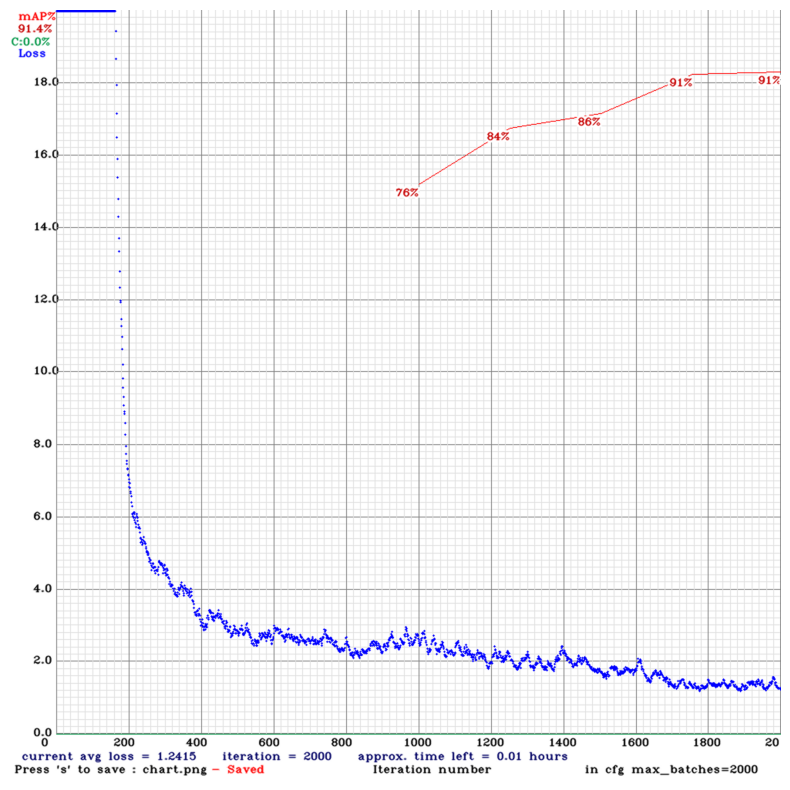

In [24]:
#only works if the training does not get interrupted 
imShow('chart.png')

In [25]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 and so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -points 0

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

In [26]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

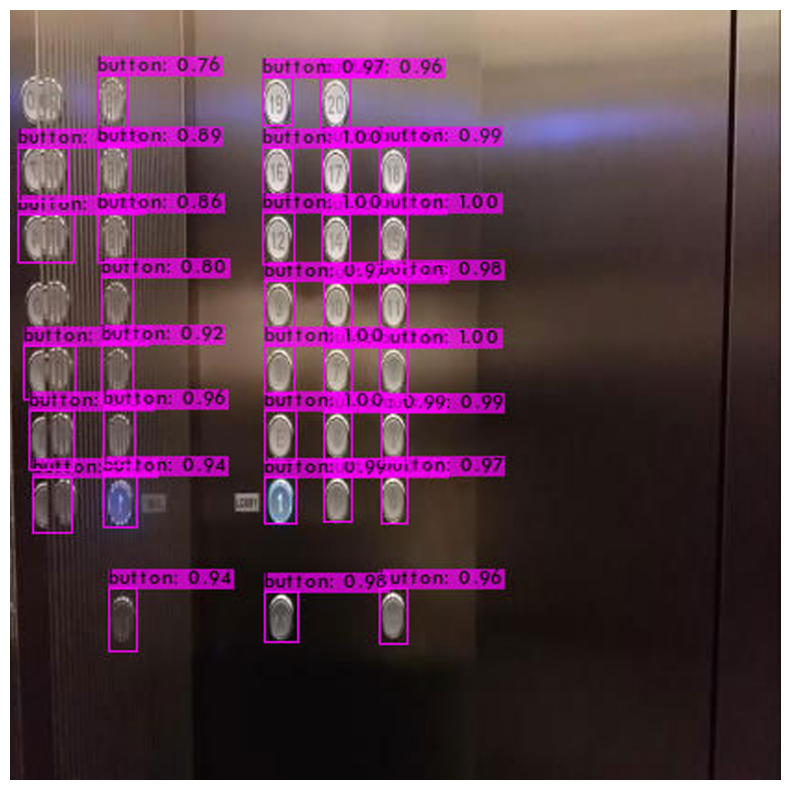

In [28]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image2.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

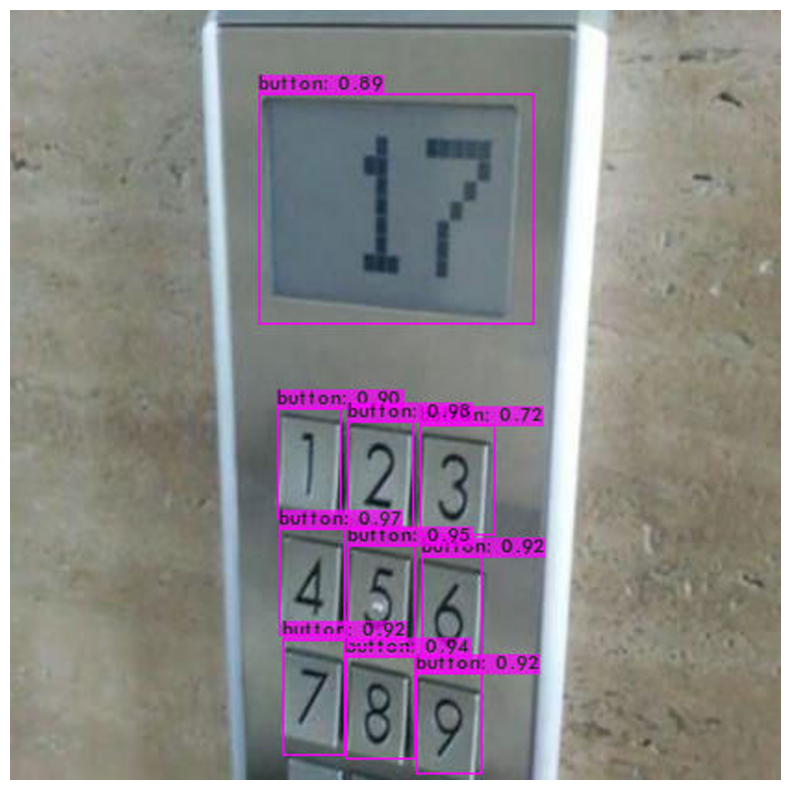

In [29]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image3.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

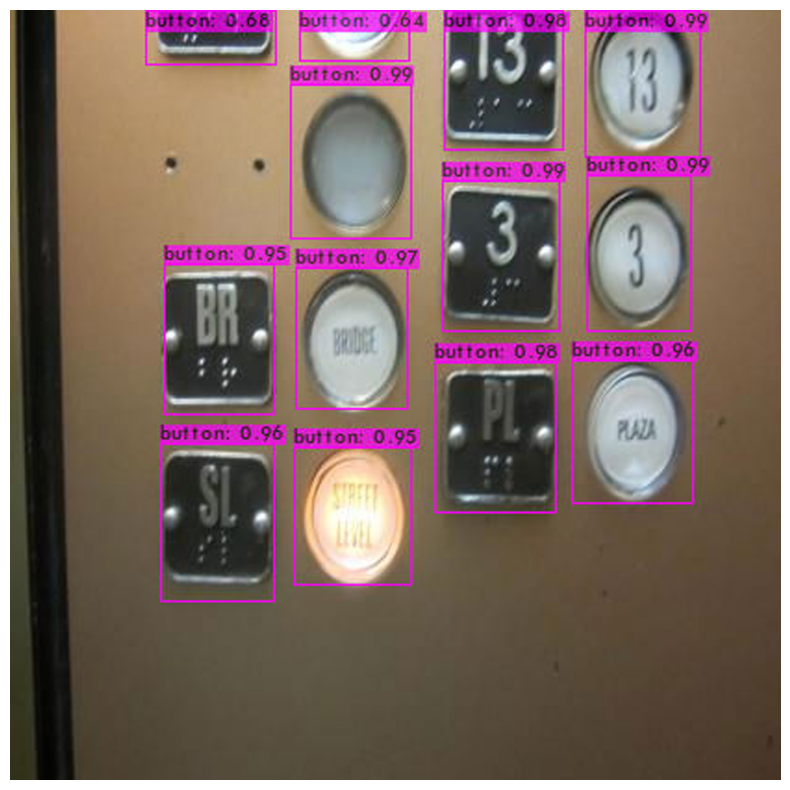

In [30]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image4.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

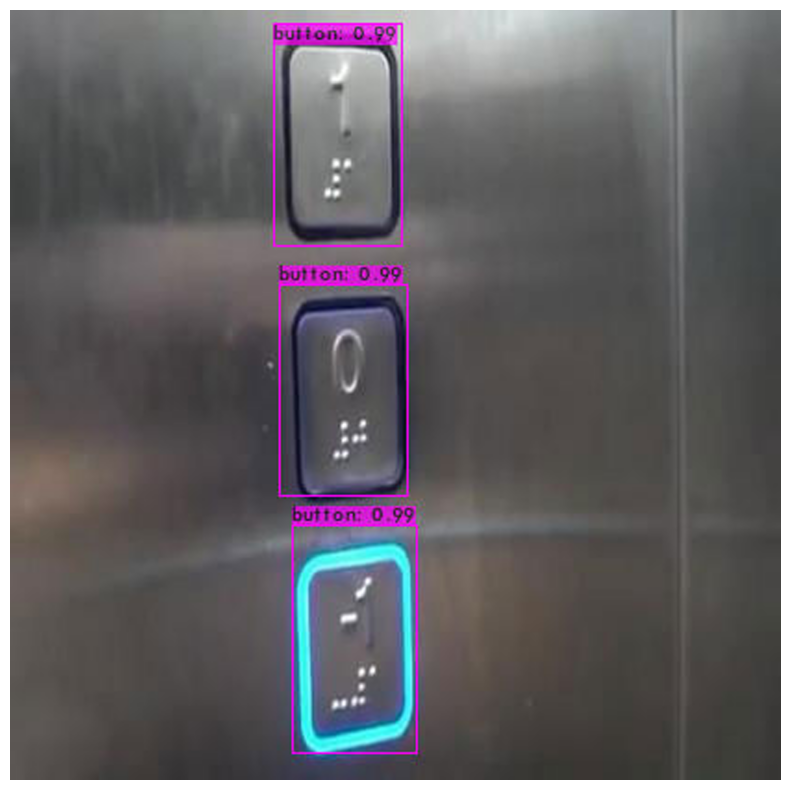

In [31]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image5.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

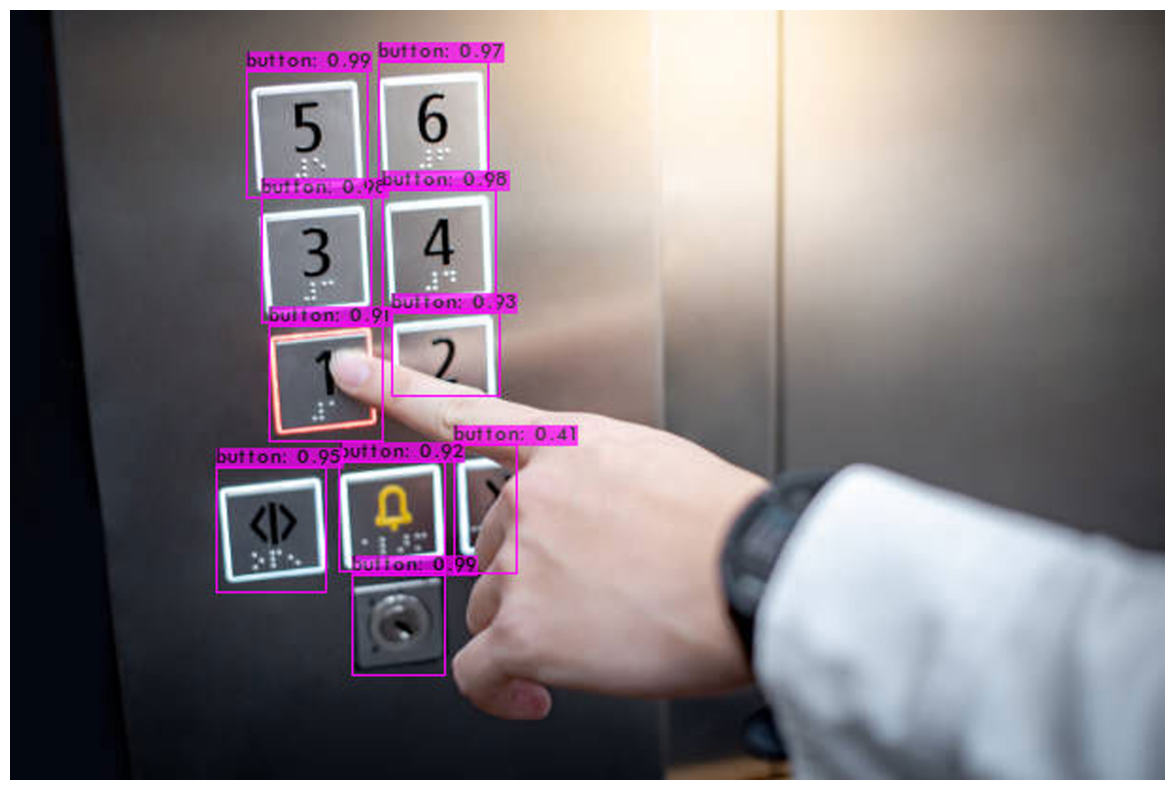

In [32]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image8.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

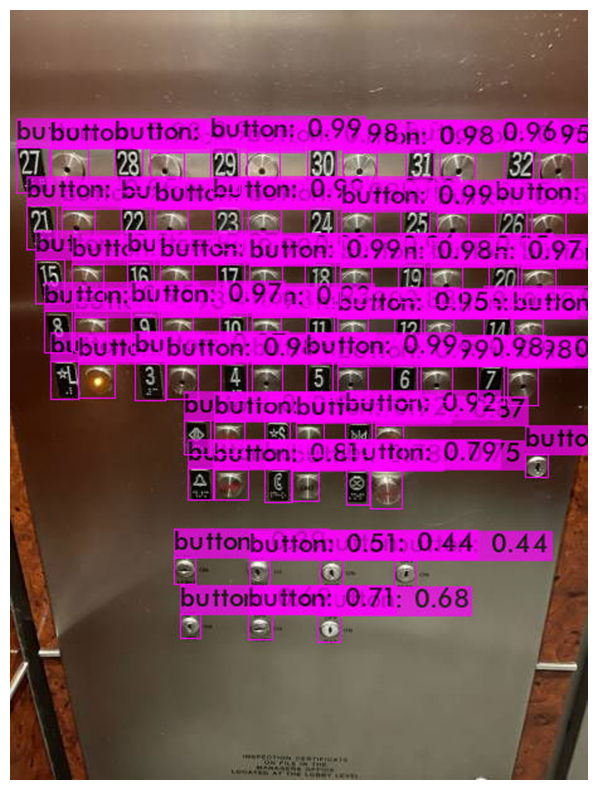

In [34]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image9.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#run detector for a video
!./darknet detector demo data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/result.avi 